In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [5]:
def load_data(data_path, label_path):
    train_data = pd.read_csv(data_path, header=None)
    train_label = pd.read_csv(label_path, header=None)

    return train_data, train_label


train_data, train_label = load_data('./data/train_in.csv', './data/train_out.csv')
test_data, test_label = load_data('./data/test_in.csv', './data/test_out.csv')

print("In the training set there are {} images each one with {} pixels".format(train_data.shape[0], train_data.shape[1]))
print("In the test set there are {} images each one with {} pixels".format(test_data.shape[0], test_data.shape[1]))

In the training set there are 1707 images each one with 256 pixels
In the test set there are 1000 images each one with 256 pixels


In [7]:
# some sanity checks
assert train_data.shape[0] == 1707
assert test_data.shape[0] == 1000
assert train_data.shape[1] == test_data.shape[1]

### After loading the data, each row represents an image and its constituted of 256 features. Each one corresponds to a pixel, so in this context each pixel of the image represents a feature:

In [14]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


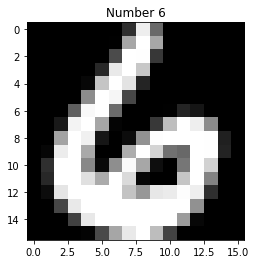

In [42]:
def image_show(array_256, label):
    first_image = array_256
    # we have to change the range from [-1,1] to [0, 1]
    first_image = np.array(first_image, dtype='float')
    first_image = first_image/2 + 0.5 # normalize taking into account the expected range by the library
    pixels = first_image.reshape((16, 16))
    plt.imshow(pixels, cmap='gray')
    plt.title(label)
    plt.show()

image_show(train_data.iloc[0], "Number " + str(train_label.iloc[0].values[0]))


# 1.1


In [17]:
# load values into memory
labels_array = train_label.values.flatten()
images_array = train_data.values

In [30]:
def digit_distribution(images, labels):
    
    label_counter = defaultdict(int)
    for _, label in zip(images, labels):
        label_counter[label] += 1
    print("The number of images for each label is distributed in the following manner:")
    label_counter = {k: v for k, v in sorted(label_counter.items(), key=lambda item: item[0])}
    for nr, counter in label_counter.items():
        print("{} : {} ({}%)".format(nr, counter, round(100*counter/len(images),3)))


digit_distribution(images_array, labels_array)

The number of images for each label is distributed in the following manner:
0 : 319 (18.688%)
1 : 252 (14.763%)
2 : 202 (11.834%)
3 : 131 (7.674%)
4 : 122 (7.147%)
5 : 88 (5.155%)
6 : 151 (8.846%)
7 : 166 (9.725%)
8 : 144 (8.436%)
9 : 132 (7.733%)


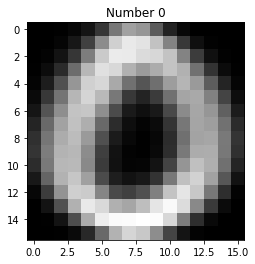

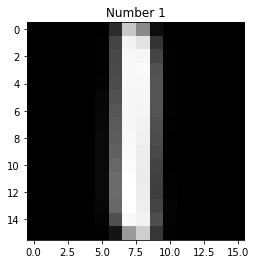

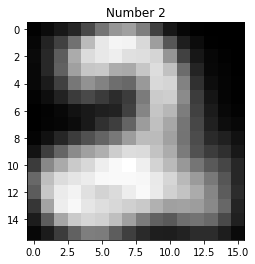

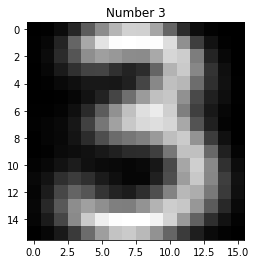

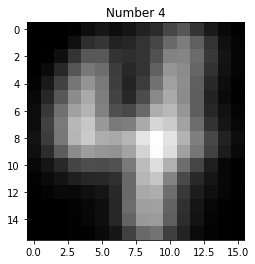

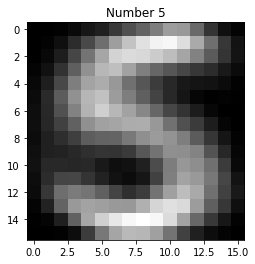

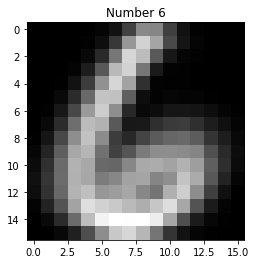

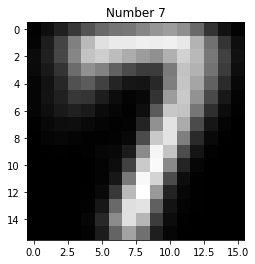

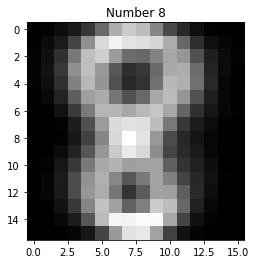

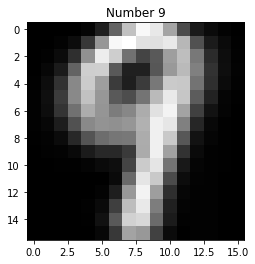

In [43]:
from functools import partial

def compute_mean_image(images, labels):
    label_counter = defaultdict(int)
    dist = defaultdict(partial(np.ndarray, 0))
    for i in range(10):
        dist[i] = np.zeros(256)
        
    
    for image, label in zip(images_array, labels_array):
        dist[label] += image
        label_counter[label] += 1


    for label, image_sum in dist.items():
        dist[label] = dist[label] / label_counter[label]

    return dist


cloud_digits = compute_mean_image(images_array, labels_array)

# show the cloud
for i in range(len(cloud_digits)):
    image_show(cloud_digits[i], "Number " + str(i))



In [44]:
def distance(image1, image2):
    assert len(image1) == len(image2)
    return np.sum((image1 - image2)**2)

In [45]:
distCloud = []

for first_label in range(10):
    temp = []
    for second_label in range(first_label + 1, 10):
        diff = distance(cloud_digits[first_label], cloud_digits[second_label])
        temp.append(round(diff,2))
    if len(temp) > 0:
        distCloud.append(temp)

print('\n'.join([' |  '.join(['{:4}'.format(item) for item in row]) 
      for row in distCloud]))        

208.79 |  87.13 |  83.61 |  115.99 |  56.54 |  66.49 |  140.77 |  98.17 |  131.99
102.52 |  137.67 |  103.51 |  123.63 |  112.67 |  115.42 |  101.74 |  98.65
66.88 |  62.93 |  62.52 |  53.76 |  78.72 |  50.09 |  78.99
82.58 |  37.44 |  86.53 |  79.61 |  49.29 |  69.8
64.02 |  77.13 |  57.5 |  54.48 |  36.13
44.87 |  84.86 |  48.54 |  68.2
118.55 |  73.74 |  108.99
71.7 |  29.45
40.97


# Given all these distances, try to say something about the expected accuracy of your classifier. What pairs of digits seem to be most difficult to separate?

In [47]:
labels_array_test = test_label.values.flatten()
images_array_test = test_data.values


# 1.2

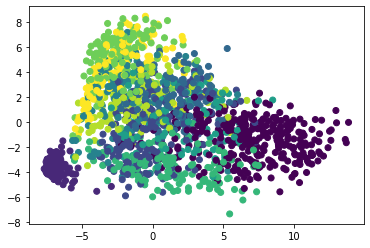

In [53]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(images_array)
trans_pca_r = pca.transform(images_array)

xs = [p[0] for p in trans_pca_r]
ys = [p[1] for p in trans_pca_r]

plt.scatter(xs, ys, c= labels_array, label=labels_array)
plt.show()

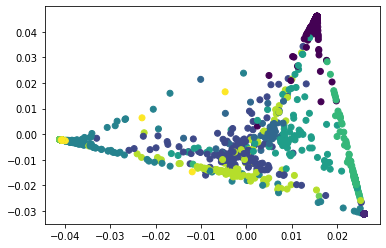

In [50]:
from sklearn.manifold import LocallyLinearEmbedding


embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(images_array)

xs = [p[0] for p in X_transformed]
ys = [p[1] for p in X_transformed]

plt.scatter(xs, ys, c= labels_array, label=labels_array)
plt.show()


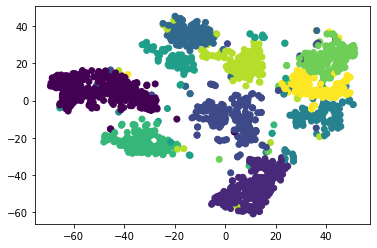

In [51]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(images_array)

xs = [p[0] for p in X_embedded]
ys = [p[1] for p in X_embedded]

plt.scatter(xs, ys, c= labels_array, label=labels_array)
plt.show()


# Does the visualization agree with your intuitions and the between-class distance matrix dist ij ?

# 1.3

In [56]:
def calculate_accuracy(cloud_digits, data, labels):

    counter = 0
    for img, true_label in zip(data, labels):
        current_dist = float('inf')
        for label, image in cloud_digits.items():
            c = distance(img, image)
            if current_dist > c:
                target_label = label
                current_dist = c
        
        if target_label == true_label:
            counter += 1
    return 100 * counter / len(labels)


In [58]:
acc_train = calculate_accuracy(cloud_digits, images_array, labels_array)
acc_test = calculate_accuracy(cloud_digits, images_array_test, labels_array_test)

print("accuracy for train set: " + str(round(acc_train,3)) + "%")
print("accuracy for test set: " + str(round(acc_test,3)) + "%")





accuracy for train set: 86.35%
accuracy for test set: 80.4%


# 1.4

Minimum error:- 0.085 at K = 1


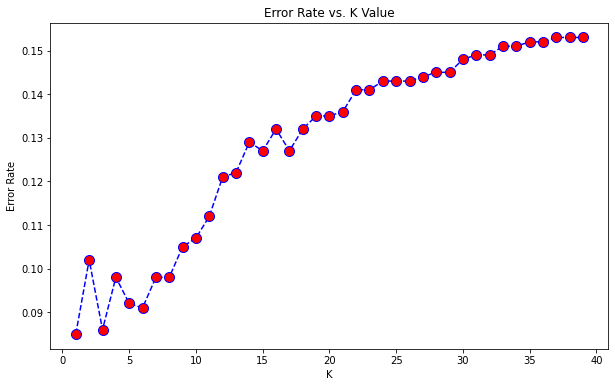

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



def knn_get_best_k(images,labels, images_test, label_test):
    error_rate = []
    for i in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(images, labels)
        pred_knni = knn.predict(images_test)
        compared_predictions = pred_knni != label_test
        error_rate.append(np.mean(compared_predictions))

    return error_rate


error_rate = knn_get_best_k(images_array, labels_array, images_array_test, labels_array_test)

# plot the error rate based on the k of the knn
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
K_number = error_rate.index(min(error_rate)) + 1
print("Minimum error:-",min(error_rate),"at K =", K_number )

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(K_number, images, labels, images_test, labels_test):
    neigh = KNeighborsClassifier(n_neighbors=K_number) 
    neigh.fit(images, labels)
    predicted = neigh.predict(images_test)
    cm = confusion_matrix(labels_test, predicted)
    return cm, predicted

cm, predicted = plot_confusion_matrix(K_number, images_array, labels_array, images_array_test, labels_array_test)
print(cm)

[[219   0   2   0   0   0   1   1   0   1]
 [  0 118   0   0   0   0   2   1   0   0]
 [  5   1  84   2   0   0   1   3   4   1]
 [  3   0   2  71   0   2   0   0   0   1]
 [  0   2   3   0  77   0   0   2   0   2]
 [  3   0   0   5   0  41   0   3   2   1]
 [  4   0   0   0   2   0  84   0   0   0]
 [  0   1   0   1   3   0   0  59   0   0]
 [  1   1   0   6   0   2   1   1  78   2]
 [  1   0   0   0   0   0   0   2   1  84]]


In [67]:
for i in range(len(cm)):
    counter = 0
    for j in range(len(cm[i])):
        if i != j:
            counter += cm[i][j]

    print("The number {} was classified wrongly {} / {} ({}%)".format(i, counter, counter + cm[i][i], round(counter * 100 /(counter + cm[i][i]),3)))
         

The number 0 was classified wrongly 5 / 224 (2.232%)
The number 1 was classified wrongly 3 / 121 (2.479%)
The number 2 was classified wrongly 17 / 101 (16.832%)
The number 3 was classified wrongly 8 / 79 (10.127%)
The number 4 was classified wrongly 9 / 86 (10.465%)
The number 5 was classified wrongly 14 / 55 (25.455%)
The number 6 was classified wrongly 6 / 90 (6.667%)
The number 7 was classified wrongly 5 / 64 (7.812%)
The number 8 was classified wrongly 14 / 92 (15.217%)
The number 9 was classified wrongly 4 / 88 (4.545%)


## The most compicated to classify is the number 5 and then the number 2 and 8.

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score, precision_score
print("      Perfomance: ")
print("Accuracy: {}".format(accuracy_score(labels_array_test, predicted)))
print("macro recall: {}".format(recall_score(labels_array_test, predicted, average='macro')))
print("micro recall: {}".format(recall_score(labels_array_test, predicted, average='micro')))
print("weighted recall: {}".format(recall_score(labels_array_test, predicted, average='weighted')))
print("macro f1-score: {}".format(f1_score(labels_array_test, predicted, average='macro')))
print("micro f1-score: {}".format(f1_score(labels_array_test, predicted, average='micro')))
print("weighted f1-score: {}".format(f1_score(labels_array_test, predicted, average='weighted')))
print("macro precision: {}".format(precision_score(labels_array_test, predicted, average='macro')))
print("micro precision: {}".format(precision_score(labels_array_test, predicted, average='micro')))
print("weighted precision: {}".format(precision_score(labels_array_test, predicted, average='weighted')))

      Perfomance: 
Accuracy: 0.915
macro recall: 0.8981685786029999
micro recall: 0.915
weighted recall: 0.915
macro f1-score: 0.90177911633946
micro f1-score: 0.915
weighted f1-score: 0.9142472803684764
macro precision: 0.9089777443517789
micro precision: 0.915
weighted precision: 0.9161915409575275


## The performance of this classifier is better than the other two

# Exercise 2

In [107]:
import numpy as np
epochs = 20
W = np.random.normal(size=(257,10))
W[0]

array([-0.49436182,  0.01506316,  1.68823177,  0.10539192, -0.39929753,
       -0.51122669, -0.2621089 , -2.69234447,  0.63019065, -0.44429407])

In [123]:
bias = 1.0

for epoch in range(epochs): # number of epochs
    for img, true_label in zip(images_array_test, labels_array_test):

    
        x_i = np.atleast_2d([*img, 1])

        result = np.dot(x_i, W)
        current_value = result[0][true_label]
        index = 0
        for value in result[0]:
            if value > current_value: # nodes that are more active than the real one
                W[:, index] = W[:, index] - x_i

            index+=1
        
        # update the current node
        W[:, true_label] = W[:, true_label] + x_i



In [124]:

counter = 0

for img, true_label in zip(images_array_test, labels_array_test):

    # add to it
    x_i = np.array([np.insert(img, 0, 1).reshape(-1)])

    result = np.dot(x_i, W)
    x_i = x_i.flatten()

    predicted = np.argmax(result[0])

    if predicted == true_label:
        counter +=1


print(counter / len(images_array_test))

0.724


# Exercise 3

In [4]:
import numpy as np
import math


def sigmoid(x):
    return 1/(1 + np.exp(-x))

def xor_net(x1, x2, weights):

    # check with the teacher !!
    assert x1 ==0 or x1 == 1
    assert x2 == 0 or x2 == 1

    input_layer = np.array([x1,x2, 1])
    first_layer_weights = np.array(weights[:6]).reshape(3, 2)

    output_first_layer = np.matmul(input_layer, first_layer_weights)

    output_first_layer = sigmoid(output_first_layer)

    output_first_layer = [*output_first_layer, 1]

    second_layer_weights = np.array([weights[6:]])
    output_layer = np.matmul(output_first_layer, second_layer_weights.T)
    output_layer = sigmoid(output_layer)
    #print(output_layer)
    return output_layer
    


In [5]:
def mse(weights):

    # should we do this this way?
    inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    expected_output = np.array([0,1,1,0])


    val = 0
    for i in range(len(inputs)):
        predicted = xor_net(inputs[i][0], inputs[i][1], weights)
        val += (predicted - expected_output[i]) ** 2

    val = val/len(inputs)

    return val



In [3]:
mse([1,2,3,4,5,4,1,1,1])

array([0.45428908])

In [ ]:
def grdmse(weights):
        


In [66]:
import numpy as np
import math


def sigmoid(x):
    return 1/(1 + np.exp(-x))


def xor_net(x1, x2, weights):

    # check with the teacher !!
    assert x1 ==0 or x1 == 1
    assert x2 == 0 or x2 == 1

    input_layer = np.array([x1,x2, 1])
    first_layer_weights = np.array(weights[:6]).reshape(3, 2)

    net_first_layer = np.matmul(input_layer, first_layer_weights)

    output_first_layer = sigmoid(net_first_layer)

    output_first_layer = [*output_first_layer, 1]

    second_layer_weights = np.array([weights[6:]])
    net_output_layer = np.matmul(output_first_layer, second_layer_weights.T)
    output_layer = sigmoid(net_output_layer)
    #print(output_layer)
    return net_first_layer, output_first_layer, net_output_layer, output_layer

def der_sigmoid(x):
    return x*(1-x)

def error(x1,x2,y):
    return y - (0 if x1 == x2 else 1)
#print(error(0,0,0))
x1 = 1
x2 = 0
net_first_layer, output_first_layer, net_output_layer, output_layer = xor_net(x1,x2,[1,2,3,4,5,4,1,1,1])

#print(net_output_layer)
out_delta = error(x1,x2,output_layer) * der_sigmoid(net_output_layer) * output_first_layer

#hidden_delta = out_delta * der_sigmoid(np.array([*net_first_layer,1])) * [x1,x2,1]

net_first_layer = [*net_first_layer,1]
#net_first_layer = [0.5,0.5,1]
#out_delta = [1,1,1]
input = [x1,x2]

hidden_delta = np.empty([2,3])
for i in range(2):
    for j in range(3):
        hidden_delta[i,j] = out_delta[j] * der_sigmoid(net_first_layer[j]) * input[i]

print('output layer delta: ',out_delta)
print('hidden layer delta: ',hidden_delta)
delta_weights = np.append(hidden_delta.transpose().flatten(),out_delta)
print(delta_weights)
#first_test = np.array(['u1','u2','b3'])
#test = np.array((['w11','w21','b1'],
#                ['w12','w22','b2']))
#supertest = np.append(test.transpose().flatten(),first_test)
#print(aaaa)
#weights = np.array(['w11','w21','w12','w22','b1','b2','w3','w4','b3'])
#print(out_delta,net_first_layer,[x1,x2,1])





output layer delta:  [0.28401766 0.28401766 0.28472167]
hidden layer delta:  [[-8.52052973 -8.52052973  0.        ]
 [-0.         -0.          0.        ]]
[-8.52052973 -0.         -8.52052973 -0.          0.          0.
  0.28401766  0.28401766  0.28472167]
